<div align="center">

# Universidad Peruana Cayetano Heredia
## Facultad de Ciencias e Ingeniería
## Departamento Académico de Ingeniería
### C8281-  INTRODUCCION A MACHINE LEARNING
### **PC1:Precios de la vivienda - Técnicas avanzadas de regresión**
----
----

**Profesor Coordinador:**
Mg. Fonseca Arroyo ,Pablo Alejandro

**Jefe de Práctica:**
Msc Paucar Escalante, Jesús

**Equipo:**
* Bernal Belisario, Brigitte
* Colla Cervantes, Marelly Massiel
* Llamoca Zarate, Diana Marysabell
* Toribio Alvarado,Stephany Marilyn


----
----

# Enlaces:


* [Kaggle](https://www.kaggle.com/code/dimalza/challenge1-machinelearning/notebook?scriptVersionId=171081133)

* [Presentación](https://drive.google.com/file/d/1QTINGP_6UD1lAg8wJsHXuOV9sOnAVLaT/view?usp=sharing)

* [GITHUB](https://github.com/Fx2048/Intro_Challenge1/tree/main)

# LIBRERÍAS

In [ ]:

import numpy as np # linear algebra
import pandas as pd

In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# EXPLORACIÓN DE DATOS

In [ ]:
train=pd.read_csv("/content/sample_data/train.csv")

train.index=train["Id"]
train.drop("Id",axis=1,inplace=True)



#Separando qué variables son numéricas y categóricas
Num=[col for col in train.columns if train[col].dtype!="object" and col!="SalePrice"]
Cat=[col for col in train.columns if train[col].dtype=="object"]

train_feat=train[Num]
train_target=train["SalePrice"]

#Features numéricas:
#Verificando si hay valores nulos
#print(train_feat_t.isnull().sum())

In [ ]:

#Como hay valores nulos, completamos los valores que faltan.
from sklearn import impute
SI=impute.SimpleImputer(strategy="mean")
train_feat_si=pd.DataFrame(SI.fit_transform(train_feat))
train_feat_si.index=train_feat.index
train_feat_si.columns=train_feat.columns

#Verificamos que ya no hayan valores nulos
#print(train_feat_si.isnull().sum())



# PREPROCESAMIENTO

In [ ]:

#Colocando a la misma escala los datos numéricos, puesto que los valores de los features están en escalas distintas
from sklearn import preprocessing
SE=preprocessing.StandardScaler()
train_feat_t=pd.DataFrame(SE.fit_transform(train_feat_si))
train_feat_t.index=train_feat_si.index
train_feat_t.columns=train_feat_si.columns



#Features categóricas:
train_feat_cat=train[Cat]

#Viendo si hay valores nulos
#print(train_feat_cat.isnull().sum())

#Para solucionar ello, usaremos SimpleImputer, pero le especificamos "most_frequent" y luego se realizará la conversión de dichas clases a números
SI_Cat=impute.SimpleImputer(strategy="most_frequent")
train_feat_c_n=pd.DataFrame(SI_Cat.fit_transform(train_feat_cat))
train_feat_c_n.index=train_feat_cat.index
train_feat_c_n.columns=train_feat_cat.columns

In [ ]:

#Verificando si ya no hay valores faltantes
#print(train_feat_c_n.isnull().sum())

#Como ya no hay valores faltantes, usaremos "OrdinalEncoder" para transformar la data categórica a data representada por números para entrenar al modelo
from sklearn import preprocessing
OE=preprocessing.OrdinalEncoder()
train_feat_c_f=pd.DataFrame(OE.fit_transform(train_feat_c_n))
train_feat_c_f.index=train_feat_c_n.index
train_feat_c_f.columns=train_feat_c_n.columns

#Ya que tanto la data numérica como la categórica han sido transformadas, procedemos a juntar ambos DF transformados en uno solo
train_features_final=pd.concat([train_feat_t,train_feat_c_f],axis=1)
train_target_final=train["SalePrice"]



# ENTRENAMIENTO DE DATA PARA MODELO DE REGRESIÓN LINEAL

In [ ]:

#Entrenamos al modelo
from sklearn import linear_model
#Regresión lineal ElasticNet
RLR=linear_model.ElasticNet() #Dejamos el valor de alpha por defecto
#Entrenando al modelo
RLR.fit(train_features_final,train_target_final)

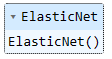

In [ ]:


#Para ver el performance del modelo, usaremos la data de test y los valores reales de "SalePrice" para ver qué tan 'preciso' es el modelo entrenado
test_features=pd.read_csv("/content/sample_data/test.csv")
test_target=pd.read_csv("/content/sample_data/sample_submission.csv")

test_features.index=test_features["Id"]
test_features.drop("Id",axis=1,inplace=True)

#Elegimos la data numérica del test
test_feat_num=test_features[Num]


#Para el output del submission####
output_submission_12=test_target.copy()
######

test_target.index=test_target["Id"]
test_target.drop("Id",axis=1,inplace=True)

#Verificamos si hay valores nulos
#print(test_feat_num.isnull().sum())
#print(test_target.isnull().sum())



In [ ]:
#Usamos SimpleImputer para completar los valores faltantes
test_features_f=pd.DataFrame(SI.transform(test_feat_num))
test_features_f.index=test_feat_num.index
test_features_f.columns=test_feat_num.columns

#Al ya no haber valores nulos, se igualará la escala de los valores numéricos
test_features_esc=pd.DataFrame(SE.transform(test_features_f))
test_features_esc.index=test_features_f.index
test_features_esc.columns=test_features_f.columns




#Ahora, la data categórica
test_features_cat=test_features[Cat]


#Realizamos lo mismo que para la data categórica de entrenamiento: completamos los valores faltantes con simple imputer y luego transformamos la data cat a num
test_feat_cat_n=pd.DataFrame(SI_Cat.transform(test_features_cat))
test_feat_cat_n.index=test_features_cat.index
test_feat_cat_n.columns=test_features_cat.columns

In [ ]:
#Como ya no hay valores faltantes, transformamos la data cat. a num. con OrdinalEncoder
test_feat_cat_f=pd.DataFrame(OE.transform(test_feat_cat_n))
test_feat_cat_f.index=test_feat_cat_n.index
test_feat_cat_f.columns=test_feat_cat_n.columns

#Ahora, juntamos la data transformada
test_features_final=pd.concat([test_features_esc,test_feat_cat_f],axis=1)
test_target_final=test_target["SalePrice"]




In [ ]:
#Ahora, usamos el modelo para predecir los datos de test
predicciones12=RLR.predict(test_features_final)

In [ ]:

output12=pd.DataFrame({'Id':output_submission_12.Id,
                     'SalePrice':predicciones12})
output12.to_csv('submission_new_12.csv',index=False)
output12=pd.DataFrame({'Id':output_submission_12.Id,
                     'SalePrice':predicciones12})
output12.to_csv('submission_new_12.csv',index=False)

# SUBMISSION.CSV


In [ ]:
%%writefile submission.csv
Id,SalePrice
1461,112411.38722258764
1462,154361.79641249386
1463,177893.82096235838
1464,199255.18052642964
1465,193986.99773352008
1466,178447.26963863964
1467,192108.86699225375
1468,170610.04874752872
1469,193215.1033841591
1470,116624.97818497293
1471,204710.1730509844
1472,102781.930534369
1473,94396.306705754
1474,146622.73905541637
1475,106904.41438047997
1476,327453.81272352696
1477,239844.38435876725
1478,298211.85228941985
1479,290699.7986558876
1480,412149.46172359376
1481,285086.7556692825
1482,210757.76129103528
1483,185456.91744523094
1484,174657.74819845898
1485,198951.16839766968
1486,207606.0186096437
1487,292896.38261102256
1488,240196.51205860765
1489,194483.21791350082
1490,241955.3221710348
1491,217696.68654494057
1492,89772.41913874297
1493,214372.2209937195
1494,277856.30311554804
1495,263064.54033159046
1496,243475.89468433577
1497,173129.66518852251
1498,178450.97469332226
1499,169384.4073221379
1500,168289.0974279483
1501,200594.1275497782
1502,161420.18931718523
1503,272816.73915645166
1504,239549.14391555454
1505,226593.14897221798
1506,200504.67839066545
1507,243311.86294877317
1508,205393.73605192927
1509,152764.99747767096
1510,145546.35526429402
1511,157904.06305790987
1512,185410.85212602583
1513,149920.66546043905
1514,154255.41043118408
1515,202740.32837858037
1516,158145.30686188216
1517,171108.4731976429
1518,129594.7752913536
1519,232337.8081962702
1520,131898.0329094993
1521,133708.61600737966
1522,189874.77446787144
1523,92324.59149247628
1524,112283.34189681734
1525,100213.27096696572
1526,95089.28252885619
1527,98839.15815338453
1528,135703.58537704445
1529,146891.51887935685
1530,192888.8261494062
1531,151942.71060056984
1532,104008.0302722603
1533,157364.35375355894
1534,143454.1888932914
1535,160615.29790774203
1536,107481.8020992104
1537,73938.87511964657
1538,156105.0217897449
1539,222805.16234206525
1540,124128.32225941078
1541,150267.62366549007
1542,138243.3058334886
1543,178196.34709479538
1544,77670.24037860215
1545,93398.42336203821
1546,139423.32997322764
1547,141320.6730829202
1548,118351.09230596416
1549,114452.45179279977
1550,129117.84289750863
1551,131290.58101930912
1552,149750.4509588931
1553,157332.54211480689
1554,114303.8410884484
1555,175614.59678473248
1556,89714.66156002136
1557,108513.82482936165
1558,117254.54945444722
1559,85379.9473042018
1560,140830.83438234628
1561,151520.58333787718
1562,142672.98578091222
1563,121262.56860194985
1564,171735.27832409274
1565,151059.35644596955
1566,226332.50413733817
1567,86404.38709692967
1568,240054.5360517213
1569,145578.91031190188
1570,140117.66095314582
1571,111784.80043789653
1572,141767.44303688366
1573,234103.4111824304
1574,130863.15481845546
1575,234998.46708571378
1576,255844.09793748122
1577,188202.91105198226
1578,155838.7403167466
1579,134421.54717510106
1580,195238.94884315174
1581,157614.00293520323
1582,120110.38908190576
1583,286267.5466064454
1584,223513.1999718533
1585,156421.64025365876
1586,48757.18011710595
1587,100865.51824503159
1588,150696.86655670073
1589,106223.27742002346
1590,132794.4358298746
1591,79765.72587470806
1592,153813.5962598203
1593,121136.93605668614
1594,129427.52268416637
1595,118859.89470636215
1596,217076.3146661233
1597,173565.5860198978
1598,192314.89611484393
1599,175392.1552234525
1600,178079.83600006293
1601,41959.34269971584
1602,124737.20175096694
1603,89801.00215440172
1604,258695.17020515446
1605,237538.2502091865
1606,168427.47107175837
1607,178338.68783234805
1608,228478.13757416335
1609,193786.0759704984
1610,157997.13923638646
1611,136270.33273967268
1612,198121.52904115312
1613,176494.55342772958
1614,136328.48614812823
1615,83452.50759171572
1616,65503.7382914568
1617,76971.72293128792
1618,117041.43563557252
1619,142568.66515280702
1620,180391.531851247
1621,136703.49050920526
1622,157478.58577497088
1623,252509.97997292384
1624,226243.7551533462
1625,122247.84573256991
1626,187934.32337834028
1627,195356.91123744706
1628,269906.3499174121
1629,176603.97150926938
1630,307111.8194794445
1631,216456.50371666212
1632,221726.65757901818
1633,179692.59893698234
1634,188590.7606000096
1635,188470.4653138994
1636,166943.05403889692
1637,200905.88396807652
1638,202528.6514310359
1639,181198.24372821435
1640,245346.53366825028
1641,187971.23833576494
1642,249536.6597490678
1643,221291.6059635484
1644,229893.25406516733
1645,236974.4276462575
1646,175759.4434805957
1647,166233.9271094908
1648,134697.20675379713
1649,150233.50054101448
1650,105886.19112605182
1651,117616.39243772662
1652,102509.8234743965
1653,99806.76653268097
1654,145477.08619569987
1655,140897.24696150655
1656,140550.60704683868
1657,143591.38275224803
1658,150278.74838926882
1659,105023.45517481847
1660,163202.08094696316
1661,390333.0541682864
1662,319555.1944386492
1663,345643.0270574617
1664,406502.8998844698
1665,300813.1537310341
1666,307208.9949190038
1667,328910.8069944747
1668,330409.56413283944
1669,296367.0316450489
1670,326090.6830973816
1671,268396.97748941474
1672,370465.9793308956
1673,276920.3274460514
1674,245322.24308492744
1675,212419.886919162
1676,212059.13758932776
1677,212798.99128006448
1678,396079.22780789854
1679,342654.50040054147
1680,305444.4428622271
1681,265061.3489290861
1682,292090.57274164754
1683,190203.60811884515
1684,195014.1698707752
1685,200773.41532994504
1686,181105.85469365487
1687,188064.3434696801
1688,210465.11559274755
1689,212109.76743232014
1690,213265.7984524515
1691,201835.9217790855
1692,263325.8962322529
1693,185908.79148711404
1694,186910.80116205534
1695,164481.93248278875
1696,260908.26659010144
1697,166798.33152774407
1698,300060.85577185045
1699,308148.10442057526
1700,244431.38097324586
1701,264075.77953527984
1702,251707.96959852995
1703,252038.30962208257
1704,273966.917121533
1705,267235.4808153663
1706,375054.93021351774
1707,225093.86929747852
1708,211534.26731476202
1709,266855.8815554386
1710,227004.25791955652
1711,272928.35616351006
1712,256127.79015553946
1713,266910.8388222378
1714,225438.798705258
1715,211548.48071165325
1716,189024.1442401573
1717,188825.08227021748
1718,140023.56678946438
1719,219505.0458531629
1720,261825.00569455806
1721,183437.1280215754
1722,134629.27169992012
1723,172944.89339294357
1724,216998.09501555312
1725,239556.343595225
1726,199301.00965493728
1727,160217.26951353767
1728,197360.83348573287
1729,165691.26179485605
1730,152373.50834717683
1731,130203.17043938312
1732,137683.5826010736
1733,110261.9261280345
1734,125701.88757090375
1735,150693.33061601315
1736,108781.6566509327
1737,285926.0587498034
1738,230201.6756749411
1739,251667.24066459728
1740,220012.22943986233
1741,200294.2160453913
1742,181470.25489448832
1743,191051.541149555
1744,309146.2437760823
1745,212419.30639771014
1746,198847.5064038498
1747,215248.48487999584
1748,221824.90801969267
1749,172566.51621228285
1750,138614.39568609645
1751,257949.49609984815
1752,108595.26267485121
1753,153921.90998194134
1754,204847.8990067539
1755,192796.9262856079
1756,125928.78192930935
1757,112246.58476316514
1758,154568.21443641325
1759,165819.72370984894
1760,172458.94617535736
1761,161511.80000212663
1762,173264.73558236106
1763,187885.39900056232
1764,104595.65388990061
1765,168855.90878805783
1766,195867.46774775424
1767,229598.3508601425
1768,139248.14576526784
1769,175338.5989792104
1770,164532.05959614986
1771,109941.95292886757
1772,136278.39965169504
1773,121900.01852363824
1774,161476.94437036087
1775,139986.81300017284
1776,121475.9271909452
1777,106554.94928753514
1778,142306.9190031599
1779,126831.01706031684
1780,176021.25034504707
1781,117142.15207421461
1782,76363.15514415901
1783,150059.05810313154
1784,113766.04600298086
1785,134328.17450328235
1786,143435.30063179682
1787,177266.42958759508
1788,78938.01495252599
1789,103974.06756257765
1790,68641.73740192596
1791,208238.6478066467
1792,160191.1482665696
1793,148624.77847213356
1794,165262.44648279157
1795,130267.73669645745
1796,144453.38480942982
1797,140706.4660450741
1798,114201.55235499896
1799,93207.10896566712
1800,125583.69270526942
1801,120069.76089070273
1802,136310.70643489284
1803,155716.88088961958
1804,149185.9727220267
1805,140656.7649867307
1806,131521.6272430048
1807,153749.71638981835
1808,127723.46241229436
1809,125257.3844988933
1810,139562.77301847178
1811,128311.15963407092
1812,111420.40993801622
1813,117140.63239049785
1814,96675.55621530057
1815,41848.036412287416
1816,108769.19921370053
1817,135645.9061798628
1818,179432.55199018284
1819,146497.3470565494
1820,69778.31532904707
1821,126933.39977863642
1822,163839.38106993854
1823,54814.562434340245
1824,125168.28915223228
1825,133518.8433917947
1826,104920.90068155712
1827,84094.5973772069
1828,123111.69397628463
1829,136431.1704248233
1830,150369.49903109053
1831,146716.23799284996
1832,94851.63320163038
1833,147420.6564968708
1834,133289.1947409658
1835,139705.6673474479
1836,112804.22995596683
1837,95555.97009372947
1838,119279.18551804697
1839,124579.44855641275
1840,137438.2868716629
1841,123663.57213118892
1842,90936.54780565998
1843,141093.02677709598
1844,145504.34154509212
1845,140063.94315833267
1846,166860.4797650813
1847,164680.29872935644
1848,47719.18473530753
1849,104430.43227138808
1850,106933.50516966775
1851,149603.78511412325
1852,123815.35992233102
1853,136597.30246171396
1854,177539.86655365973
1855,169898.3749410307
1856,230256.7952898614
1857,151526.14318287448
1858,135758.18631268817
1859,111900.98742817946
1860,165385.36255221424
1861,111806.80704332957
1862,298367.5490843764
1863,297489.061532141
1864,297500.10703270533
1865,324213.5320991219
1866,323230.5078570805
1867,233376.60250089978
1868,295976.6655114187
1869,219282.95689442125
1870,233757.38770020328
1871,253605.56477227862
1872,198077.29171742915
1873,227826.7293224725
1874,137755.81153625308
1875,194792.8165086931
1876,194673.04233227627
1877,214096.86553087234
1878,212082.1849492153
1879,125097.79788381483
1880,127017.48990811848
1881,250577.74781281297
1882,250408.46960560867
1883,191754.71260415018
1884,201322.83491637828
1885,235260.893101638
1886,278231.7466267037
1887,227060.7755679987
1888,265462.22395648615
1889,179854.9489408917
1890,113359.16814930008
1891,139989.0614823312
1892,83938.79820282648
1893,126664.13349723355
1894,117573.14361495436
1895,138113.81947521248
1896,125560.52169178521
1897,121938.12117353574
1898,117044.96697362141
1899,148946.05323362886
1900,134518.37028081337
1901,146958.33656799502
1902,134579.92228007718
1903,196013.13212203834
1904,127305.62710319793
1905,183354.2071670966
1906,155265.45452246565
1907,209741.928684165
1908,98840.372389538
1909,141496.75749257364
1910,120244.37369137518
1911,192622.7062500817
1912,267142.9086951223
1913,182076.80124508328
1914,62497.74459066262
1915,284610.4101359241
1916,46314.0790670655
1917,243782.9400489191
1918,145292.63181402214
1919,186898.15784312802
1920,161148.09162529375
1921,355002.69355063234
1922,319815.28081324685
1923,229145.68726876355
1924,246436.27324492182
1925,218607.24454691992
1926,353300.8192619012
1927,139865.12891509093
1928,177703.55830187275
1929,123293.63416375041
1930,139593.0992469458
1931,152643.45713004994
1932,141145.4759443176
1933,184114.3755462522
1934,181147.2948452753
1935,176724.6963758872
1936,193364.08267859643
1937,183423.89036956563
1938,184702.5775807154
1939,239599.32155858033
1940,192627.02041848027
1941,175238.69689541316
1942,194345.6046929807
1943,201748.9756091659
1944,316240.79722040147
1945,338804.4794548056
1946,151760.08555040974
1947,289993.76066551986
1948,181182.8694005178
1949,258364.5986784309
1950,193051.36795631598
1951,266641.2529457645
1952,227597.39343838292
1953,204451.94290376612
1954,186565.5496547483
1955,128186.11689243106
1956,325416.67525223934
1957,156198.14095145202
1958,286344.45884871914
1959,141954.0873048869
1960,108739.31551286919
1961,120635.68874234399
1962,94774.7426350549
1963,112165.92584486552
1964,105605.59604112634
1965,145483.80353727803
1966,138743.4395374026
1967,277781.9601215604
1968,362763.0685008726
1969,344767.759022544
1970,344471.2178650502
1971,396914.27092088177
1972,343520.6512337132
1973,280459.3530860009
1974,308092.6075156466
1975,401537.64086462173
1976,270011.9117435314
1977,328705.51931911433
1978,309680.4314802725
1979,303081.8255704605
1980,195680.9732970291
1981,323665.1790019039
1982,218939.52810288203
1983,206654.74643044337
1984,182188.11220247223
1985,220280.88676631995
1986,214188.10982216077
1987,192969.90918144566
1988,195211.30847781402
1989,207125.0210746764
1990,226187.32310266182
1991,218947.4339612978
1992,238118.37793209607
1993,190282.76437475366
1994,228152.2927306569
1995,186946.60986724726
1996,275748.57302263845
1997,297428.99406768585
1998,290043.10398136394
1999,273875.92006837804
2000,288623.03057839227
2001,295915.58871962625
2002,253119.78498386452
2003,260633.45796214673
2004,284578.2700208182
2005,244528.39773127696
2006,215661.4514911075
2007,258842.45056535734
2008,221889.2467710122
2009,207868.95587527636
2010,219278.42989668337
2011,151524.7296048121
2012,191631.70050140627
2013,193764.49335765847
2014,209015.51567881193
2015,219748.69836650233
2016,204085.66602401642
2017,207716.94877389394
2018,122411.58555425786
2019,143226.65028074355
2020,105174.25187402697
2021,101152.2929146663
2022,195232.44862248327
2023,152304.49397291336
2024,283617.09833514306
2025,325011.6745806602
2026,181791.72829808385
2027,165400.07820525052
2028,154026.6572017685
2029,167335.26068151672
2030,268373.7722029604
2031,243977.72175035765
2032,257639.34694003698
2033,256262.03539229673
2034,180503.84547405504
2035,220983.05998183772
2036,216557.71157154077
2037,221224.6297614401
2038,295171.80725728435
2039,217831.54616698207
2040,312513.84211163316
2041,284213.78545947274
2042,207658.9203656828
2043,182099.58492433702
2044,184123.66154330908
2045,211455.81607835615
2046,142217.1075629993
2047,141817.32820835704
2048,150844.97369925882
2049,146102.21564145567
2050,174111.99602718992
2051,105302.38374419759
2052,118753.96325051159
2053,153401.62396430998
2054,72476.21729829183
2055,166316.14857197372
2056,152010.09539810295
2057,119404.91358349817
2058,224176.52370550737
2059,139252.91340998304
2060,179719.58510416327
2061,182606.73267549748
2062,118375.68166425025
2063,111186.46107522662
2064,132794.10370791622
2065,115436.18591709853
2066,176734.64824706782
2067,122461.59097349273
2068,142054.48536520556
2069,71755.78311520978
2070,100332.20335933489
2071,97500.31137631372
2072,162240.41698579505
2073,144532.04266240128
2074,197862.76205928973
2075,145540.6103085617
2076,117761.7607170977
2077,152297.91400249198
2078,112380.27022954445
2079,143895.38554090302
2080,105124.89199608228
2081,120826.04612288276
2082,127254.6716722965
2083,139835.8285924163
2084,89647.64099863613
2085,114314.11441728688
2086,123406.84885251606
2087,130407.74069484767
2088,111913.05185962319
2089,85883.78888320534
2090,135346.7635137196
2091,104926.61901670073
2092,136842.97774133016
2093,151927.62165548018
2094,121914.5593364821
2095,150517.14906199038
2096,83818.81567992984
2097,112443.36201096435
2098,149829.62413994374
2099,29409.94634166578
2100,78392.17446409009
2101,131502.86225087807
2102,137141.23958805815
2103,102811.15562592457
2104,145024.88634830818
2105,152576.9734588794
2106,69928.22128395029
2107,201351.71114287458
2108,127132.57533293053
2109,100189.80581464486
2110,117868.92829293419
2111,141921.67995097418
2112,121023.3205179523
2113,122095.62098429065
2114,119020.0832821226
2115,156667.37548968353
2116,109294.34859048882
2117,143051.76181349816
2118,117596.89459797462
2119,101019.67621691395
2120,123919.78409909159
2121,80220.85570785208
2122,105536.8572377925
2123,74320.94817092514
2124,152694.59840926935
2125,142801.1928275574
2126,157855.80648874308
2127,165424.32071069203
2128,140860.64734804851
2129,97491.31296057704
2130,119840.09548996591
2131,144966.99172665612
2132,118068.24215243816
2133,121187.409132971
2134,127037.30093196662
2135,109463.2157069798
2136,75017.92928577974
2137,108988.71386714431
2138,150365.85662910528
2139,161767.71888288713
2140,154772.38892984093
2141,171879.16611255403
2142,136575.045409846
2143,148554.9502670095
2144,124379.19883317807
2145,148281.18706629565
2146,157277.97848156572
2147,164540.4560526479
2148,146487.33760454901
2149,174472.03307617886
2150,213868.46426312608
2151,115502.06045425312
2152,188260.09511069287
2153,181115.8316456625
2154,105249.62970562441
2155,136840.43592224148
2156,264624.04895824945
2157,247600.20091923038
2158,235247.29501218165
2159,230100.93542521592
2160,194442.2982527502
2161,250387.0534480017
2162,342870.1130007707
2163,346962.7668850424
2164,254596.2982806589
2165,200952.40613596607
2166,146698.12474206003
2167,217906.4203511944
2168,198673.31027485052
2169,202819.89873455866
2170,211833.69440090813
2171,162527.47242258364
2172,142411.8501416321
2173,158903.0476753333
2174,225026.32533573816
2175,266953.92232796573
2176,285113.2914950034
2177,231528.80555556898
2178,225166.94105508947
2179,146504.24691090762
2180,200728.28179248178
2181,195022.44929692883
2182,219516.6881181804
2183,200927.88463708022
2184,118913.89336156481
2185,140189.85714880057
2186,154246.98193301732
2187,167305.1884960594
2188,161884.5679414613
2189,287240.40370492975
2190,57466.555144359765
2191,57296.73190172471
2192,79779.49570394895
2193,115777.21298731644
2194,96575.90454199047
2195,98920.62975131246
2196,104894.83192107908
2197,116200.70924125258
2198,162109.10999330826
2199,185225.58880654813
2200,133532.67346747953
2201,140464.58555320342
2202,198634.38902589103
2203,130544.64708531262
2204,159689.41890331823
2205,99510.30453660946
2206,139504.91258147644
2207,188241.71344616244
2208,224982.98629798373
2209,201931.1435226389
2210,111037.88927594702
2211,105744.43310152598
2212,125126.6387359562
2213,102398.74827039779
2214,159986.68641081126
2215,90551.97504669394
2216,153364.6348965119
2217,77539.62939409824
2218,89551.76145168148
2219,79490.2410456893
2220,99434.21375992951
2221,286318.8217035256
2222,264740.4334169854
2223,292199.069840022
2224,219445.2154469585
2225,115522.31547747308
2226,190690.0304860967
2227,223537.98595937242
2228,281158.3359904267
2229,252494.98196028545
2230,152911.09992521832
2231,228248.5146294417
2232,196157.33978688304
2233,214950.41281779506
2234,271688.28920070996
2235,243297.96953362157
2236,263386.44291170366
2237,324612.6844146636
2238,208925.52498785342
2239,109225.54098800555
2240,173790.13723454057
2241,173321.6150304515
2242,123562.8119235369
2243,125913.05446455533
2244,112015.00731656504
2245,98802.2800984411
2246,146066.4406641905
2247,120525.12916379653
2248,113512.07460665172
2249,123476.31349587937
2250,125329.8446222575
2251,110719.29402007324
2252,183298.29839856643
2253,156611.681215871
2254,179200.4981724177
2255,191031.50357874756
2256,184528.1437688092
2257,206644.32872374245
2258,173969.76899132307
2259,180762.49278603224
2260,159612.40183662766
2261,188837.74171464564
2262,196368.11188810196
2263,334906.83691938577
2264,406122.4542687072
2265,176479.69451928357
2266,274443.2377152634
2267,330028.77254977106
2268,362841.931267489
2269,162595.76573090407
2270,210562.68957914787
2271,216448.4664707416
2272,253445.31281732593
2273,177983.01597737588
2274,192487.41569895172
2275,180186.74110896036
2276,202149.0086997158
2277,185034.9390627993
2278,144634.85931421642
2279,140809.05253423308
2280,104962.32365232405
2281,181233.64512366106
2282,190297.9907536589
2283,113243.90430817181
2284,131585.44874234952
2285,128951.6281860576
2286,119630.70352999198
2287,334230.64406579116
2288,270362.75185295223
2289,300210.8072438985
2290,373335.0160863343
2291,308365.81906264107
2292,371337.7067527173
2293,387970.1573571038
2294,340964.40786713164
2295,407949.8113296708
2296,249553.24879843366
2297,324256.9079524313
2298,329781.59604527213
2299,334318.6556810988
2300,297133.8844239428
2301,305177.0315077441
2302,250046.93983021195
2303,240087.27483941396
2304,236505.3791918842
2305,210961.02644466228
2306,208648.904876064
2307,217914.1208223547
2308,221451.28664343807
2309,287652.553983987
2310,211525.4883433841
2311,210724.02318917308
2312,193334.7027506693
2313,186744.32222966064
2314,183634.17235865304
2315,195194.10687886426
2316,204272.94201242775
2317,203358.42323825738
2318,199277.17037404524
2319,193108.46956779464
2320,188639.9819287322
2321,232356.40277067138
2322,202275.47466576204
2323,192543.4992409271
2324,200579.48759533645
2325,226710.70154843864
2326,191147.45911231183
2327,211202.3947181161
2328,228195.77331381632
2329,192252.7830325675
2330,189376.78884216223
2331,320326.5578636876
2332,334387.0164546813
2333,284744.65017825493
2334,245134.23596184986
2335,268657.7911517942
2336,286663.1988245511
2337,200403.56236765513
2338,256964.82383648716
2339,232229.66895445084
2340,374559.36027965083
2341,228680.76557804362
2342,242897.94492170063
2343,243120.99925681436
2344,222398.59359631597
2345,230649.66477393731
2346,211545.47229670826
2347,200947.41646075397
2348,242958.11770348143
2349,189911.96975104915
2350,311101.07890089706
2351,261795.2980485287
2352,258236.34115464083
2353,259400.76260657894
2354,139643.65928050183
2355,152868.66317447985
2356,173865.05989279167
2357,212256.6284407714
2358,208875.3691999478
2359,132000.0791311268
2360,117436.12318434856
2361,146113.7063489983
2362,262435.8329661805
2363,160880.66465650615
2364,180569.57183760052
2365,231689.02643002273
2366,195219.6543590348
2367,213137.92761345432
2368,215284.5150948265
2369,210113.43424095857
2370,172945.69162831173
2371,172738.67193301767
2372,204227.3487610335
2373,282685.8577982219
2374,298314.4689836771
2375,230203.33810978322
2376,286019.04610609834
2377,308507.9935054652
2378,154120.2777703547
2379,212639.34585115756
2380,168571.91236785852
2381,188358.2546502872
2382,211816.59860684443
2383,206183.2668787378
2384,244750.33720954062
2385,180801.8236302501
2386,140587.72755485214
2387,130124.35540191228
2388,108264.56166493711
2389,126508.89479931376
2390,147030.10427275475
2391,151325.5825114902
2392,101285.29408429256
2393,182207.4198868454
2394,137975.19583144144
2395,210923.38523713412
2396,143940.69045220927
2397,215463.90993399
2398,122209.47038060518
2399,74065.6158273897
2400,59140.663969215035
2401,111861.93062341362
2402,146629.05338809686
2403,139060.2864556589
2404,164068.6885805737
2405,174846.3245030328
2406,136188.085037189
2407,138827.8943962449
2408,157125.9404102903
2409,121645.36823953142
2410,189293.5173821448
2411,100556.46798799232
2412,159124.57899935692
2413,119268.42011530457
2414,150837.64769240806
2415,134725.280889967
2416,119156.30491160289
2417,121049.47395972883
2418,119267.78637184227
2419,136086.43686801515
2420,119383.25740092075
2421,135585.2290950491
2422,104483.66158158232
2423,141273.45642264024
2424,158801.6447556748
2425,214639.8755556193
2426,145823.00728544625
2427,139736.4550395329
2428,189087.98418731708
2429,108208.43474797977
2430,130939.25559278637
2431,109758.49561457343
2432,147479.93650388118
2433,135783.50552607008
2434,135456.85013016645
2435,150692.99682771944
2436,111395.52979432144
2437,102756.59004124127
2438,125257.76971635905
2439,114990.6718005624
2440,126127.27421897052
2441,132564.4699837207
2442,102400.9432986522
2443,139018.3878295197
2444,149302.16752981255
2445,103758.47041879104
2446,143897.5080672598
2447,206303.31571929043
2448,131165.33348315855
2449,119504.51591577959
2450,161997.76170677858
2451,136432.93770871096
2452,190940.26715582656
2453,86471.95917803106
2454,123356.41173252375
2455,116191.1760382229
2456,128041.10053443852
2457,125091.08966773465
2458,127147.95304387265
2459,100509.13873273086
2460,141207.39751051855
2461,113901.5477010561
2462,124274.30187708153
2463,122421.68361873752
2464,175842.1479095227
2465,136260.90274977032
2466,123556.73457236073
2467,163579.83118863776
2468,93783.51673019398
2469,86272.4517401095
2470,201983.16153081853
2471,207054.73716233813
2472,170195.53843019318
2473,118600.69212299312
2474,97546.95817601081
2475,212626.25477469058
2476,108688.41975194031
2477,124566.05840458359
2478,165933.0394286716
2479,106343.61136400637
2480,157006.7628617831
2481,141765.87979365664
2482,142634.17923168652
2483,111330.28573324111
2484,131215.84209231142
2485,131693.7773324643
2486,149566.69785680657
2487,221886.96679018994
2488,174755.2560541559
2489,153064.5593271422
2490,155713.2977453845
2491,99335.04466025594
2492,195276.73469773986
2493,165816.64412427138
2494,149564.92976943657
2495,76406.11861061034
2496,242676.6628605281
2497,156289.60885878443
2498,99768.56354243799
2499,83013.62213017399
2500,115091.4379118992
2501,144975.85624859092
2502,145024.5501795297
2503,112941.13782835759
2504,182608.90787145853
2505,227139.4070994352
2506,258649.63460493315
2507,280226.7898720403
2508,260857.58889748115
2509,228156.2695850389
2510,222279.06377938026
2511,183690.45836251375
2512,207983.2081464942
2513,243554.42626965203
2514,265479.77978059504
2515,142854.39405812975
2516,181422.56162181884
2517,137675.51831273368
2518,152165.72322930186
2519,223893.6056346162
2520,218925.51897871777
2521,196168.62479945293
2522,224580.92539404827
2523,126415.71075977718
2524,147013.62403548538
2525,147261.03830737667
2526,146114.54776811204
2527,123005.74541657638
2528,119688.97955583583
2529,145632.91263525456
2530,122914.53860964252
2531,235712.29245024145
2532,222316.1970033944
2533,208864.5789770038
2534,246126.39461472555
2535,266779.4443209931
2536,237182.16990650725
2537,226269.9902145485
2538,193301.93427863606
2539,202327.3505879419
2540,189085.7308498123
2541,189978.41820791556
2542,176347.40419779567
2543,131307.4888180387
2544,109562.9415609827
2545,136711.87997978082
2546,134832.8417125995
2547,150319.51056966145
2548,156078.99475786247
2549,159693.53467826892
2550,572574.4106653453
2551,147554.65479255922
2552,139673.09580258845
2553,77018.33552843923
2554,78993.91265894863
2555,105279.77689570696
2556,88383.4074777426
2557,102232.43398217035
2558,160432.76291348995
2559,120809.19544770675
2560,144129.0430873516
2561,125090.47292953431
2562,119944.60994680822
2563,115336.24919916033
2564,177013.99342666054
2565,127537.72394421471
2566,149233.16995408118
2567,123190.34313222706
2568,187656.8068195167
2569,210362.0550737424
2570,114534.17508634484
2571,175615.35647948965
2572,148997.92371863127
2573,224300.46954770686
2574,238209.04207473114
2575,141032.54781346017
2576,130071.3953641678
2577,159599.08837232078
2578,82598.9676039115
2579,34563.27718576533
2580,113842.33910712467
2581,125965.81351501294
2582,139012.67442018056
2583,252742.2923871827
2584,186748.96645487344
2585,208877.09660444246
2586,220925.94363791964
2587,196729.63813029678
2588,140069.5672527069
2589,161637.50384605298
2590,234145.52867399686
2591,253332.0405795185
2592,222222.53180243165
2593,275494.10884421295
2594,189867.7073302492
2595,226564.9382794546
2596,308059.959149466
2597,218285.70710869992
2598,281673.82728779456
2599,339316.8762034197
2600,164737.22894226498
2601,157961.91573565785
2602,77163.7920580873
2603,96008.15092961008
2604,84799.6154407093
2605,86868.18787924653
2606,165408.56250895618
2607,220207.5494642734
2608,209405.88150673642
2609,180785.22683081758
2610,100501.20495215118
2611,137013.86109059182
2612,161049.99631679532
2613,132986.16447139636
2614,111710.55010286487
2615,164716.17715616513
2616,161495.43211742069
2617,198041.0758253322
2618,233913.3441323202
2619,209283.53370772966
2620,186681.84432446538
2621,177305.23163238674
2622,187302.35430782702
2623,235395.4511128139
2624,289611.7064602329
2625,268092.02190261724
2626,181987.97949296486
2627,159918.7970438052
2628,375025.1532873014
2629,404204.1037671962
2630,318334.39307066356
2631,391622.2758267537
2632,360677.80321367097
2633,274974.76069408865
2634,366615.90279908036
2635,170985.21121313772
2636,184687.7506191477
2637,205390.58912031513
2638,260490.5411745326
2639,192129.4192340723
2640,159395.0673119558
2641,98393.28196565835
2642,191614.1066713633
2643,108368.06326784957
2644,125937.0098517301
2645,114819.41466355011
2646,98998.9583188154
2647,116963.4898395209
2648,147443.2816754955
2649,146652.99624003348
2650,123662.5986574811
2651,146495.54734596726
2652,343033.9061732742
2653,251985.529008127
2654,255117.9773051442
2655,359951.93503630627
2656,314011.45155022456
2657,333382.5997681314
2658,298775.40882760263
2659,284662.73666502524
2660,334901.39116790064
2661,318927.4083280838
2662,345430.0216349832
2663,268224.32183160906
2664,277133.58407532616
2665,305097.00603700674
2666,278125.6486658641
2667,191905.167688636
2668,194748.65549303257
2669,200049.1209907324
2670,274632.9591501675
2671,201656.12738928947
2672,202569.13661314643
2673,202078.4605371332
2674,204492.78483773084
2675,175657.15640618184
2676,216481.7748601016
2677,205390.80819350196
2678,246301.7199482336
2679,267859.4225541645
2680,262350.4928455453
2681,360822.8204756224
2682,301211.3850893362
2683,412907.7787478686
2684,293776.68217931123
2685,298882.25926478696
2686,255341.0666871461
2687,286684.74846494914
2688,223842.78072143527
2689,205694.98667767295
2690,354701.6252327201
2691,197242.8868715199
2692,144509.87411473587
2693,223389.30374358408
2694,147968.6237604
2695,213920.32298393297
2696,205018.88777205677
2697,195139.05023793963
2698,221574.9338134452
2699,179804.9483002161
2700,162342.49827690644
2701,179581.91246051205
2702,131293.88403222436
2703,138108.5189946571
2704,147746.9380028518
2705,110509.99365947371
2706,113864.0122099826
2707,136618.52425731008
2708,122342.83512994483
2709,105893.9620508055
2710,124279.19624874562
2711,288420.0795529312
2712,341657.0025049735
2713,177866.32143482313
2714,162205.29289448584
2715,177146.56034746717
2716,159998.1683145487
2717,202619.32329142734
2718,225050.7530091145
2719,169125.21343042396
2720,195257.4646990692
2721,136429.91525564418
2722,186943.98988658018
2723,169960.37867782064
2724,130688.45890093794
2725,127960.54934458564
2726,145777.92714050208
2727,182664.085964338
2728,191924.5365875814
2729,148336.49032829743
2730,143147.56775184599
2731,130813.14666880552
2732,123454.67526398298
2733,152629.14940982906
2734,148320.76311126503
2735,140318.9323777338
2736,128624.69921867303
2737,104133.89093505767
2738,132767.64456711092
2739,161133.87699309835
2740,140249.48860827571
2741,158210.38795633966
2742,181940.61859486904
2743,163465.81034399997
2744,168932.68538979196
2745,152231.06417061453
2746,126608.76193929238
2747,158167.34878130414
2748,119104.3731324229
2749,133120.1597725246
2750,123943.53752340931
2751,132194.74473793444
2752,225946.72984479496
2753,151019.94067300158
2754,235186.4347448654
2755,136207.963823902
2756,95432.15692723477
2757,83660.93494504783
2758,114308.84342551431
2759,159727.43676730274
2760,139752.39448434618
2761,151392.8956046807
2762,148899.19845817803
2763,193842.85597555185
2764,169924.48351396306
2765,260078.0392758386
2766,135063.63981248625
2767,77296.44843363704
2768,110921.17598239101
2769,126552.51764592047
2770,144363.57412004255
2771,103680.21506898517
2772,105715.85646878615
2773,189517.5104972727
2774,142035.69197855145
2775,136481.42303829401
2776,154308.5484466057
2777,171912.29617910518
2778,114993.51867886107
2779,148935.02781168814
2780,103498.77865633063
2781,86254.23635749515
2782,102428.82381719527
2783,94998.54106959679
2784,125011.07291780344
2785,152569.6036501135
2786,70594.28008913348
2787,130523.51596041468
2788,82157.01696501885
2789,181202.01351819863
2790,95436.58507513082
2791,120587.48971502323
2792,85259.36235510172
2793,151548.93954281794
2794,91742.90996336706
2795,113063.90571673152
2796,73532.50503466986
2797,205668.1597822612
2798,123198.39846064252
2799,141178.70703442785
2800,64845.63507428116
2801,100146.08356101174
2802,130734.60409819231
2803,160012.3832940947
2804,124259.69597536484
2805,91818.78704933506
2806,82222.07764336161
2807,170384.68467878265
2808,170473.75770023305
2809,126091.3477009689
2810,125951.78303190795
2811,178014.84428462925
2812,176304.14003650472
2813,175340.90346024872
2814,165111.63292586495
2815,117120.29633922152
2816,225069.03635669756
2817,164360.42067421303
2818,146435.0550527089
2819,179631.3676598506
2820,141569.1250622127
2821,118062.25138849435
2822,192245.11251060624
2823,287049.8990533544
2824,186712.9657375344
2825,166351.5210266397
2826,136906.4836491042
2827,132281.64575270284
2828,254195.31537847524
2829,224706.15406465923
2830,222109.28447989371
2831,195697.0928643769
2832,233667.44513970512
2833,288434.2277732801
2834,221313.16314161845
2835,226482.16877672134
2836,218626.78742412306
2837,163899.81939416134
2838,141508.89120251214
2839,191935.2144462216
2840,194937.14114554352
2841,206711.66258777646
2842,230997.26144232485
2843,158282.5390394975
2844,173315.99111928247
2845,109272.95473433302
2846,216140.83307868932
2847,204097.1868610926
2848,211275.63600842058
2849,201642.73390016894
2850,275303.9659599018
2851,221017.2431587355
2852,237355.78949741166
2853,236321.99904967647
2854,159323.30241833272
2855,205907.1464443861
2856,205569.82916962006
2857,200139.44299700836
2858,207923.2816476547
2859,122737.02902080749
2860,140137.1113923038
2861,128097.98364939963
2862,224712.06625313862
2863,138268.55270188348
2864,257131.84398544868
2865,140168.48343798734
2866,160188.90714131118
2867,103178.23476342928
2868,123294.00943791663
2869,100342.02368129414
2870,135435.27878244894
2871,80225.06002931405
2872,27516.688567351783
2873,89028.6121038448
2874,159796.2970038415
2875,121439.63368406805
2876,178919.37871139945
2877,130304.25065271005
2878,135982.9879236607
2879,146613.24659199332
2880,113121.08217289981
2881,118367.45722449153
2882,152966.33051704225
2883,187552.99432621524
2884,191182.6841184995
2885,162275.68303950047
2886,221563.9632347434
2887,95939.33870577117
2888,148823.0621098549
2889,47097.14037357745
2890,81678.35384067692
2891,148769.55817515473
2892,35671.9071363197
2893,84214.0674125891
2894,71627.87801307926
2895,294489.7620658715
2896,261528.89870334556
2897,215525.78301675033
2898,155791.61059556116
2899,226560.63195450828
2900,161420.32663549462
2901,223430.13388533366
2902,219571.81823436494
2903,314159.05479268054
2904,333767.4162123588
2905,77140.4855338104
2906,207885.52680545562
2907,109070.42045440797
2908,131929.80617507116
2909,157347.80814583757
2910,71037.55781671024
2911,70644.7754444083
2912,163995.00984080922
2913,69206.04257225952
2914,63790.7107990853
2915,73688.52254879594
2916,69047.6365349266
2917,164022.88406725525
2918,117992.62275216241
2919,240011.13671083792


# KAGGLE

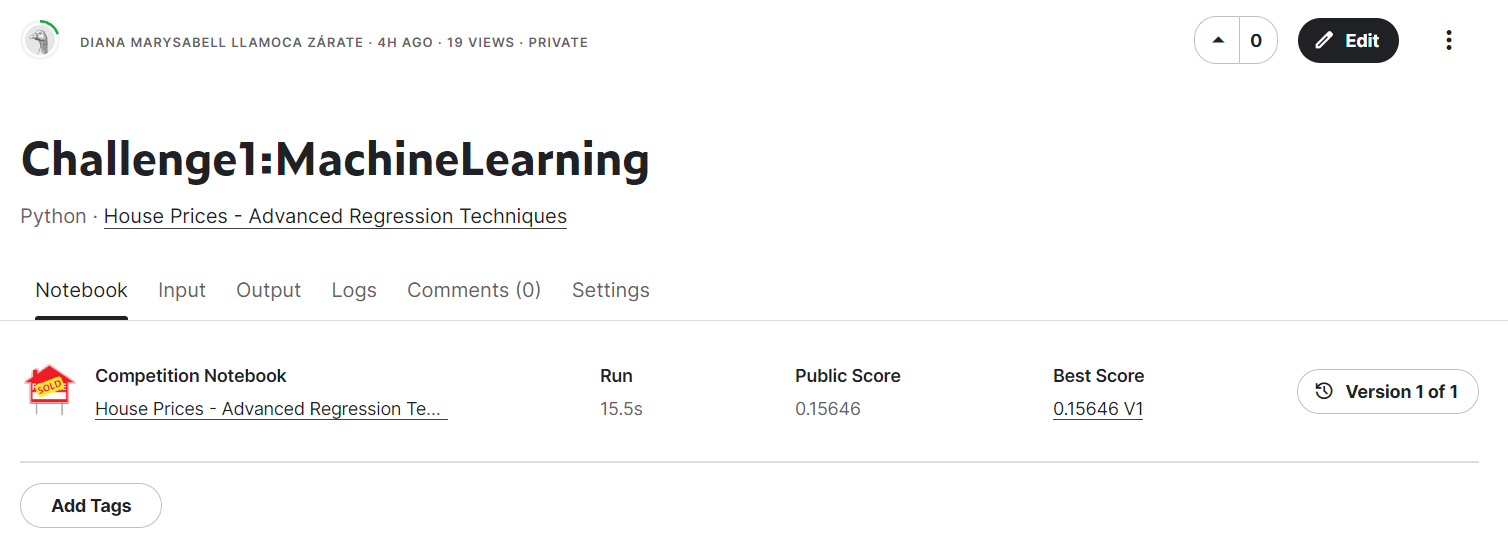